In [131]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as ticker
sns.set(palette = "dark")
import warnings
warnings.filterwarnings("ignore")

In [132]:
#IMPORTING DATASETS
orders=pd.read_excel('orders_merged.xlsx')
sellers=pd.read_csv('olist_sellers_dataset.csv')
cust=pd.read_csv('olist_customers_dataset.csv')
geo=pd.read_csv('olist_geolocation_dataset.csv')
reviews=pd.read_csv('olist_order_reviews_dataset.csv')
items=pd.read_excel('merged_items.xlsx')
pay=pd.read_csv('olist_order_payments_dataset.csv')
it=pd.read_csv('olist_order_items_dataset.csv')

In [133]:
#merging sellers dataset with ratings 
merged_sellers=pd.merge(sellers, items, on='seller_id', how = 'left')
merged_s=merged_sellers[['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'product_id', 'shipping_limit_date', 'order_id',
       'price','olist_products_dataset.product_category_name',
       'product_category_name_english']]

merg_sell=pd.merge(merged_s, reviews, on='order_id', how = 'left')

In [134]:
merg_sell.isna().sum()

seller_id                                           0
seller_zip_code_prefix                              0
seller_city                                         0
seller_state                                        0
product_id                                          0
shipping_limit_date                                 0
order_id                                            0
price                                               0
olist_products_dataset.product_category_name     1612
product_category_name_english                    1636
review_id                                           0
review_score                                        0
review_comment_title                            99700
review_comment_message                          64730
review_creation_date                                0
review_answer_timestamp                             0
dtype: int64

In [135]:
#dropping and renaming columns in the merged dataset
sell_rating = merg_sell.drop([ 'review_comment_title', 'review_id', 'review_comment_message', 'review_creation_date', 'product_id','review_answer_timestamp'], axis=1)
sell_rating =sell_rating.rename(columns={'product_category_name_english': 'product_eng','seller_zip_code_prefix':'zip_code', 'olist_products_dataset.product_category_name': 'product_por',})

In [136]:
sell_rating.head()

,seller_id,zip_code,seller_city,seller_state,shipping_limit_date,order_id,price,product_por,product_eng,review_score
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,2017-08-25 20:50:19,4a90af3e85dd563884e2afeab1091394,106.20,esporte_lazer,sports_leisure,5
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,2017-05-11 16:25:11,6d953888a914b67350d5bc4d48f2acab,101.70,esporte_lazer,sports_leisure,1
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,2017-09-05 12:50:19,bc8a5de6abf5b14f98a6135a7fb46731,10.80,esporte_lazer,sports_leisure,3
3,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,2017-10-06 02:14:42,0504447548229e075dea8441b37b1e2a,199.90,papelaria,stationery,5
4,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,2017-12-07 14:13:33,16fd9b360cbadca08b1026c8532820f5,199.99,papelaria,stationery,5


In [137]:
sell_rating.isna().sum().sort_values(ascending=False)

product_eng            1636
product_por            1612
seller_id                 0
zip_code                  0
seller_city               0
seller_state              0
shipping_limit_date       0
order_id                  0
price                     0
review_score              0
dtype: int64

In [138]:
sell_rating['product_por'].unique()


array(['esporte_lazer', 'papelaria', 'fashion_bolsas_e_acessorios',
       'malas_acessorios', 'bebes', 'eletronicos', 'alimentos',
       'informatica_acessorios', 'brinquedos', 'telefonia', 'cool_stuff',
       'consoles_games', 'casa_conforto', 'audio', 'pet_shop',
       'instrumentos_musicais',
       'moveis_cozinha_area_de_servico_jantar_e_jardim', 'beleza_saude',
       'cama_mesa_banho', 'moveis_decoracao', 'moveis_escritorio',
       'ferramentas_jardim', 'automotivo', 'climatizacao', nan,
       'utilidades_domesticas', 'relogios_presentes', 'perfumaria',
       'moveis_sala', 'artigos_de_natal', 'cine_foto', 'telefonia_fixa',
       'fashion_underwear_e_moda_praia',
       'construcao_ferramentas_construcao', 'artes', 'eletroportateis',
       'sinalizacao_e_seguranca', 'livros_interesse_geral',
       'livros_tecnicos', 'pc_gamer', 'construcao_ferramentas_seguranca',
       'bebidas', 'eletrodomesticos', 'casa_construcao',
       'artes_e_artesanato', 'fashion_esporte', 'm

In [139]:
sell_rating[sell_rating['product_por'] == 'portateis_cozinha_e_preparadores_de_alimentos']

,seller_id,zip_code,seller_city,seller_state,shipping_limit_date,order_id,price,product_por,product_eng,review_score
3073,3296662b1331dea51e744505065ae889,15805,catanduva,SP,2018-08-30 13:15:50,a73d469a8747dea1740e9545d1051002,517.80,portateis_cozinha_e_preparadores_de_alimentos,NaN,5
21372,ed8cb7b190ceb6067227478e48cf8dde,11015,santos,SP,2018-08-02 13:30:55,53fa17c349c4b3dcbbadd8aad2eb559b,21.52,portateis_cozinha_e_preparadores_de_alimentos,NaN,3
21373,ed8cb7b190ceb6067227478e48cf8dde,11015,santos,SP,2018-08-02 17:15:17,67f38c0b9d8a42541af92de7b6a19ea5,21.52,portateis_cozinha_e_preparadores_de_alimentos,NaN,4
21374,ed8cb7b190ceb6067227478e48cf8dde,11015,santos,SP,2018-07-26 01:50:13,b1829b9fc61d2f28d8668cd5bde29e3f,17.42,portateis_cozinha_e_preparadores_de_alimentos,NaN,2
21375,ed8cb7b190ceb6067227478e48cf8dde,11015,santos,SP,2018-07-31 02:50:18,b35a771164a9defa3b4767f1b66918b1,21.52,portateis_cozinha_e_preparadores_de_alimentos,NaN,3
21376,ed8cb7b190ceb6067227478e48cf8dde,11015,santos,SP,2018-07-27 09:19:02,c67c6e7178cff9848b2d6556d1670fd8,20.09,portateis_cozinha_e_preparadores_de_alimentos,NaN,5
21377,ed8cb7b190ceb6067227478e48cf8dde,11015,santos,SP,2018-08-02 03:35:16,d94600e5b855ffe8db3b9bc06e21b1bd,17.53,portateis_cozinha_e_preparadores_de_alimentos,NaN,1
21378,ed8cb7b190ceb6067227478e48cf8dde,11015,santos,SP,2018-08-02 03:35:16,d94600e5b855ffe8db3b9bc06e21b1bd,17.53,portateis_cozinha_e_preparadores_de_alimentos,NaN,1
29229,ba90964cff9b9e0e6f32b23b82465f7b,7140,guarulhos,SP,2018-08-08 09:35:13,2d3bc1f6ed458a137c51adc3cab7a488,1099.00,portateis_cozinha_e_preparadores_de_alimentos,NaN,3
29230,ba90964cff9b9e0e6f32b23b82465f7b,7140,guarulhos,SP,2018-05-14 17:30:44,7faf8b9448b66f4a3ac98a312b3e7609,979.00,portateis_cozinha_e_preparadores_de_alimentos,NaN,5


In [140]:
#replacing some of thw missing values in english product names
sell_rating.loc[sell_rating['product_por'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_eng'] = sell_rating.loc[sell_rating['product_por'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_eng'].fillna('portable kitchen_and_food_preparators')
sell_rating.loc[sell_rating['product_por'] == 'pc_gamer', 'product_eng'] = sell_rating.loc[sell_rating['product_por'] == 'pc_gamer', 'product_eng'].fillna('pc_gamer')

In [141]:
sell_rating.isna().sum().sort_values(ascending=False)

product_por            1612
product_eng            1612
seller_id                 0
zip_code                  0
seller_city               0
seller_state              0
shipping_limit_date       0
order_id                  0
price                     0
review_score              0
dtype: int64

In [142]:
sell_rating=sell_rating.fillna('Unknown')

In [143]:
sell_rating.isna().sum().sort_values(ascending=False)

seller_id              0
zip_code               0
seller_city            0
seller_state           0
shipping_limit_date    0
order_id               0
price                  0
product_por            0
product_eng            0
review_score           0
dtype: int64

In [144]:
#cleaning orders dataset
orders.isna().sum().sort_values(ascending=False)

order_delivered_customer_date                          3421
product_category_name_english                          2567
olist_products_dataset.product_category_name           2542
order_delivered_carrier_date                           2086
price                                                   833
shipping_limit_date                                     833
seller_id                                               833
freight_value                                           833
product_id                                              833
order_approved_at                                       177
payment_type                                              3
payment_value                                             3
customer_zip_code_prefix                                  0
customer_state                                            0
customer_city                                             0
order_id                                                  0
olist_order_reviews_dataset.review_answe

In [164]:
order = orders.drop(['seller_id','order_delivered_customer_date','order_approved_at','order_delivered_carrier_date'], axis=1)
order =order.rename(columns={'product_category_name_english': 'product_eng','customer_zip_code_prefix':'zip_code', 'olist_products_dataset.product_category_name': 'product_por','olist_order_reviews_dataset.review_answer_timestamp':'review_date','olist_order_reviews_dataset.review_score':'review_score'})

In [165]:
order.loc[order['product_por'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_eng'] = order.loc[order['product_por'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_eng'].fillna('portable kitchen_and_food_preparators')
order.loc[order['product_por'] == 'pc_gamer', 'product_eng'] = order.loc[order['product_por'] == 'pc_gamer', 'product_eng'].fillna('pc_gamer')

In [166]:
order.isna().sum().sort_values(ascending=False)

product_eng                      2542
product_por                      2542
price                             833
shipping_limit_date               833
freight_value                     833
product_id                        833
payment_type                        3
payment_value                       3
review_date                         0
customer_state                      0
customer_city                       0
zip_code                            0
order_id                            0
review_score                        0
customer_id                         0
order_estimated_delivery_date       0
order_purchase_timestamp            0
order_status                        0
customer_unique_id                  0
dtype: int64

In [168]:
missing = order[order['payment_value'].isnull() | order['payment_type'].isnull()]
missing

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,payment_type,payment_value,freight_value,product_por,product_eng,product_id,review_score,review_date,zip_code,customer_city,customer_state,shipping_limit_date,price,customer_unique_id
115728,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-10-04,NaN,NaN,2.83,beleza_saude,health_beauty,5a6b04657a4c5ee34285d1e4619a96b4,1,2016-10-07 18:32:28,14600,sao joaquim da barra,SP,2016-09-19 23:11:33,44.99,830d5b7aaa3b6f1e9ad63703bec97d23
115729,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-10-04,NaN,NaN,2.83,beleza_saude,health_beauty,5a6b04657a4c5ee34285d1e4619a96b4,1,2016-10-07 18:32:28,14600,sao joaquim da barra,SP,2016-09-19 23:11:33,44.99,830d5b7aaa3b6f1e9ad63703bec97d23
115730,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-10-04,NaN,NaN,2.83,beleza_saude,health_beauty,5a6b04657a4c5ee34285d1e4619a96b4,1,2016-10-07 18:32:28,14600,sao joaquim da barra,SP,2016-09-19 23:11:33,44.99,830d5b7aaa3b6f1e9ad63703bec97d23


In [169]:
ord=order.dropna(subset=['payment_value', 'payment_type','freight_value','product_id'])


In [170]:
ord=ord.fillna('Unknown')

In [171]:
ord.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
payment_type                     0
payment_value                    0
freight_value                    0
product_por                      0
product_eng                      0
product_id                       0
review_score                     0
review_date                      0
zip_code                         0
customer_city                    0
customer_state                   0
shipping_limit_date              0
price                            0
customer_unique_id               0
dtype: int64

In [172]:
#slicing for dates considered for the business case
#for purchase time stamp
# Convert 'timestamp' column to datetime
ord['order_purchase_timestamp'] = pd.to_datetime(ord['order_purchase_timestamp'])

# Filter out rows with timestamps between '2016-12-31 23:59:00' and '2018-08-31 23:59:00'
mask = (ord['order_purchase_timestamp'] > '2016-12-31 23:59:00') & (ord['order_purchase_timestamp'] < '2018-08-31 23:59:00')
ord_ = ord.loc[mask]

# Extract month and year from the remaining rows
ord_['purchase_month'] = ord_['order_purchase_timestamp'].dt.strftime('%b')
ord_['purchase_year'] = ord_['order_purchase_timestamp'].dt.year



### Question 1: What is the total revenue generated by Olist, and how has it changed over time?


In [173]:
revenue = ord_['payment_value'].sum()
revenue_formatted = "{:.2f}M".format(revenue / 1000000)
print(f'The total revenue generated by Olist is {revenue_formatted}')

The total revenue generated by Olist is 20.34M


How has it changed over time?

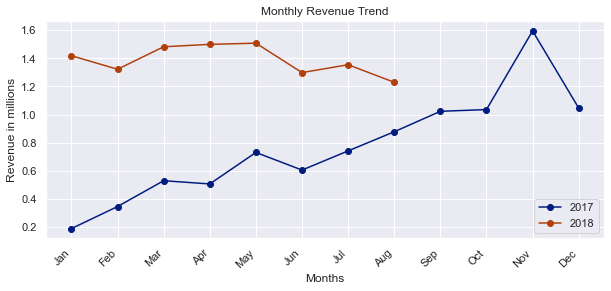

In [174]:
df = ord_.groupby(['purchase_month', 'purchase_year']).payment_value.sum().unstack().reset_index()
sort_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df.index = pd.CategoricalIndex(df['purchase_month'], categories=sort_order, ordered=True)
df = df.sort_index()
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.index, df.iloc[:, 1:]/1000000, marker='o')

# Set the y-axis tick format to millions
fmt = ticker.StrMethodFormatter('{x:,.1f}')
ax.yaxis.set_major_formatter(fmt)

# Add the "Revenue in millions" label to the y-axis
ax.set_ylabel('Revenue in millions')
ax.set_xlabel('Months')
ax.set_title('Monthly Revenue Trend')

# Set the x-axis tick labels and rotation
ax.set_xticks(range(len(sort_order)))
ax.set_xticklabels(sort_order, rotation=45, ha='right')

ax.legend(df.iloc[:, 1:].columns)

plt.show()

 **Discussion**: The revenue trend of the company was analyzed based on the provided dataset. The highest revenue generated for the period in review was in Nov. 2017 with a total revenue of 1.6M. However, 2018 saw an impressive and commendable increase in monthly revenue compared to 2017. Although the monthly revenue for 2018 is higher than 2017, there were inconsistencies in revenue generation on a month-on-month basis. This indicates that revenue generation in 2018 was not stable, and it would be important to monitor this trend to identify the underlying causes of the fluctuations.

### Question 2: How many orders were placed on Olist, and how does this vary by month or season?

In [175]:
total_orders=ord_['order_id'].count()
print(f'The total orders placed on Olist are {total_orders}')

The total orders placed on Olist are 117924


variation by month and/or season

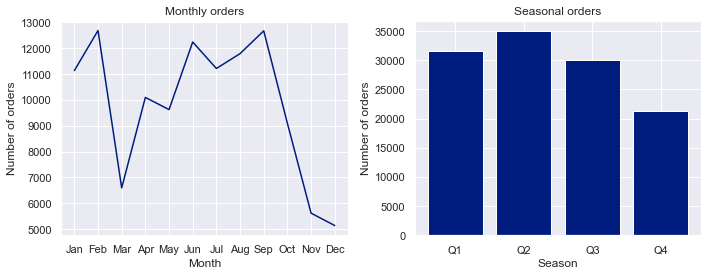

In [176]:
#Extracting seasons
ord_["order_date"] = pd.to_datetime(ord_["order_purchase_timestamp"])
ord_["season"] = pd.cut(ord_["order_date"].dt.month, 
                             bins=[0, 3, 6, 9, 12], 
                             labels=["Q1", "Q2", "Q3", "Q4"])

# Group orders by month and season, and count the number of orders in each group
orders_by_month = ord_.groupby("purchase_month")["order_id"].count().reset_index()
orders_by_season = ord_.groupby("season")["order_id"].count().reset_index()

orders_by_month.index = pd.CategoricalIndex(df['purchase_month'], categories=sort_order, ordered=True)
orders_by_month = orders_by_month.sort_index()
# Visualize the results using a line chart for monthly orders and a bar chart for seasonal orders

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(orders_by_month.index, orders_by_month["order_id"])
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Number of orders")
ax[0].set_title("Monthly orders")

ax[1].bar(orders_by_season["season"], orders_by_season["order_id"])
ax[1].set_xlabel("Season")
ax[1].set_ylabel("Number of orders")
ax[1].set_title("Seasonal orders")

plt.tight_layout()
plt.show()









**Discussion**: The plot of Seasonal orders shows that the fourth quarter had the lowest number of orders, with a significant drop observed in the months of September to December. This trend should be investigated and addressed in order to increase sales. The second quarter had the highest number of orders, while a dip in March resulted in a decrease in total orders registered for the first quarter. Overall, monitoring and analyzing monthly order trends can help the company optimize its sales strategy and improve performance.

### Question 3: What are the most popular product categories on Olist, and how do their sales volumes compare to each other?

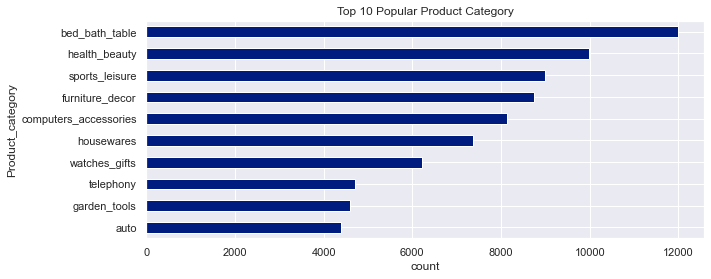

In [177]:
top10_products = ord_.groupby('product_eng').product_eng.count().\
sort_values(ascending = False)


fig, ax = plt.subplots(figsize=(10, 4))
top10_products.head(10).sort_values(ascending = True).plot(kind = 'barh')
ax.set_ylabel('Product_category')
ax.set_xlabel('count')
ax.set_title('Top 10 Popular Product Category')
plt.show()


The top 3 most popular products are bed_bath_table, health_beauty and sports_leisure

### Question 4: What is the average order value (AOV) on Olist, and how does this vary by product category or payment method?

In [178]:
revenue/total_orders

172.5092518062481

In [179]:
# Group the data by product category and calculate the AOV for each category
aov_by_category = ord_.groupby('product_eng')['payment_value'].sum() / ord_.groupby('product_eng')['order_id'].nunique()

print('Average order value by product category:')
print(aov_by_category.sort_values(ascending=False))
# Group the data by payment method and calculate the AOV for each method
aov_by_payment = ord_.groupby('payment_type')['payment_value'].sum() / ord_.groupby('payment_type')['order_id'].nunique()

print('Average order value by payment type:')
print(aov_by_payment.sort_values(ascending=False))

Average order value by product category:
product_eng
computers                                1542.108011
fixed_telephony                           973.097170
small_appliances_home_oven_and_coffee     683.057600
agro_industry_and_commerce                652.365989
home_appliances_2                         535.602692
                                            ...     
cds_dvds_musicals                          99.952500
fashion_childrens_clothes                  98.208750
books_technical                            95.339807
flowers                                    76.310690
home_comfort_2                             71.272500
Length: 74, dtype: float64
Average order value by payment type:
payment_type
boleto         208.105265
credit_card    206.097039
debit_card     167.379263
voucher        108.709758
dtype: float64


**Discussion:** Based on the analysis, the average order value on Olist ranges from 0 to 652.37, with an overall average of approximately 172. The average order value varies by product category, with `computer` having the highest average order value at 1542.11 and `home_comfort_2` having the lowest average order value at 71.27. The average order value also varies by payment type, with `boleto` having the highest average order value at 207.71 and `voucher` having the lowest average order value at 112.10. These insights can help Olist to understand customer behavior and optimize their pricing and marketing strategies to increase revenue.

### Question 5: What is the average customer rating for products sold on Olist, and how does this impact sales performance?


In [180]:
cust_review = ord_.groupby('product_eng').agg({'review_score':'mean', 'payment_value':'sum'}).\
round({'review_score': 0})
cust_review.groupby('review_score').payment_value.sum().to_frame()

,payment_value
review_score,
2.0,324.51
3.0,12290.88
4.0,20329166.19
5.0,1199.43


**Discussion:** the customers of Olist rate the products sold quite high, with an average minimum rating of 2.0. Furthermore, it was observed that products with top ratings of 4.0 or higher generate the highest sales.

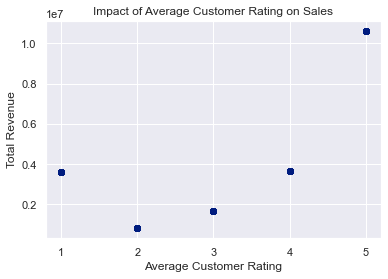

In [181]:
# group by product_id and calculate mean review_score
product_ratings = ord_.groupby('product_id')['review_score'].mean().round()

# calculate total revenue for each rating
rating_revenue = ord_.groupby('review_score')['payment_value'].sum()

# create scatter plot
merged_data = pd.merge(product_ratings, rating_revenue, on='review_score')

plt.scatter(merged_data['review_score'], merged_data['payment_value'])
# set xticks to be integers 1 to 5
plt.xticks(range(1, 6))

# add axis labels and title
plt.xlabel('Average Customer Rating')
plt.ylabel('Total Revenue')
plt.title('Impact of Average Customer Rating on Sales')

# display plot
plt.show()

**Discussion:** The scatterplot shows a positive correlation between the average customer rating and total revenue, suggesting that products with higher ratings are more likely to sell well than those with lower ratings. This could be due to several factors, such as higher quality products or better customer service from the sellers. It is also possible that customers are more likely to leave positive reviews for products they are satisfied with, which can lead to higher ratings and increased sales. Overall, it is clear that customer ratings can have a significant impact on sales performance on Olist.

### Question 6: What is the average order cancellation rate on Olist, and how does this impact seller performance?

In [182]:
# calculate the cancellation rate
cancelled_orders = ord_[ord_['order_status'] == 'canceled']
cancellation_rate = len(cancelled_orders) / len(orders)

print('The average order cancellation rate on Olist is {:.2f}%'.format(cancellation_rate * 100))



The average order cancellation rate on Olist is 0.47%


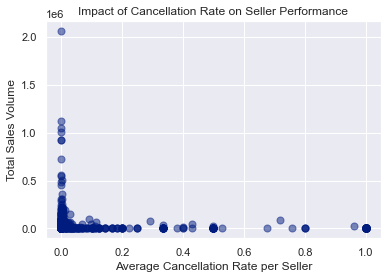

In [183]:
# merge orders and sellers datasets
ord_sellers = pd.merge(ord_, sell_rating, on='order_id')
ord_sell = ord_sellers.drop(['order_estimated_delivery_date', 'payment_type',
       'product_por_x', 'product_eng_x', 'product_id', 'review_score_x',
       'review_date', 'zip_code_x', 'customer_city', 'customer_state',
       'purchase_month', 'purchase_year', 'season'], axis=1)
# calculate average cancellation rate per seller
seller_cancellation_rate = ord_sell.groupby('seller_id')['order_status'].apply(lambda x: (x == 'canceled').mean())
total_sales = ord_sell.groupby('seller_id')['payment_value'].sum()

# create scatter plot
plt.scatter(seller_cancellation_rate, total_sales, s=50, alpha=0.5)

# add axis labels and title
plt.xlabel('Average Cancellation Rate per Seller')
plt.ylabel('Total Sales Volume')
plt.title('Impact of Cancellation Rate on Seller Performance')

# display plot
plt.show()

**Discussion:** There is a negative correlation, so we can conclude that a high cancellation rate negatively impacts seller performance.The plot shows the impact of cancellation rate on seller performance. From the plot, it can be observed that sellers with lower average cancellation rates tend to have higher sales compared to those with higher cancellation rates. Specifically, sales with an average cancellation rate of less than 0.1 appear to have higher performance than those with higher cancellation rates. This suggests that maintaining a low cancellation rate is an important factor for seller success on Olist.

### Question 7: How many sellers are active on Olist, and how does this number change over time?

3095


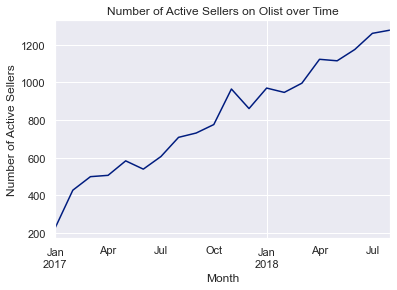

In [184]:
num_sellers = len(sellers)
print(num_sellers)

# group orders by month and count number of unique sellers
monthly_sellers = ord_sell.groupby(pd.Grouper(key='order_date', freq='M'))['seller_id'].nunique()

# plot the number of active sellers over time
monthly_sellers.plot(kind='line', xlabel='Month', ylabel='Number of Active Sellers', title='Number of Active Sellers on Olist over Time')
plt.show()

**Discussion:** The plot above shows that the number of active sellers on Olist has been increasing over time. Therefore, it can be inferred that Olist has been successful in attracting new sellers and retaining existing ones, which could be attributed to the platform's user-friendly interface, competitive commission rates, and effective marketing strategies.

### Question 8: What are the top-selling products on Olist, and how have their sales trends changed over time?


product_eng
bed_bath_table           1741913.82
health_beauty            1657014.14
computers_accessories    1597177.96
furniture_decor          1432399.73
watches_gifts            1427085.44
sports_leisure           1396343.00
housewares               1095163.57
auto                      852378.98
garden_tools              839256.40
cool_stuff                780598.56
Name: payment_value, dtype: float64


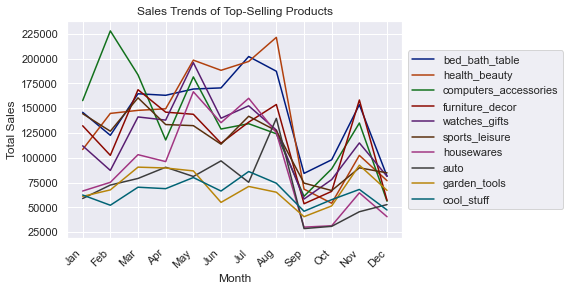

In [185]:
# define the order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# group orders by product and calculate total sales
product_sales = ord_.groupby('product_eng')['payment_value'].sum()

# sort products based on total sales and select top-selling products
top_products = product_sales.sort_values(ascending=False)[:10]
print(top_products)
# plot sales trends of top-selling products
for product in top_products.index:
    product_orders = ord_[ord_['product_eng'] == product]
    sales_by_month = product_orders.groupby(['purchase_month'])['payment_value'].sum()

    # convert month names to a categorical data type with the specified order
    sales_by_month.index = pd.Categorical(sales_by_month.index, categories=month_order, ordered=True)
    sales_by_month = sales_by_month.sort_index()

    plt.plot(sales_by_month.index, sales_by_month.values, label=product)

# add legend, axis labels, and title
plt.legend()
# move legend outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Month')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales')
plt.title('Sales Trends of Top-Selling Products')

# display plot
plt.show()


**Discussion:** `bed_bath_table` is the top-selling product overall on Olist. The plot shows that `computer_accessories` and `health_beauty` had the highest revenues generated in the months of February and August, respectively. This could be due to several factors such as promotions, customer preferences, among other things. On the other hand, the least selling products were `auto` and `housewares` between the months of September and October.

### Qyestion 9: Which payment methods are most commonly used by Olist customers, and how does this vary by product category or geographic region?

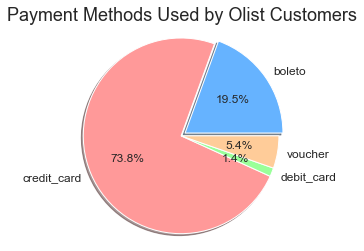

In [186]:
# group orders by payment method and calculate count
ords = ord_.drop(ord_[ord_['payment_type'] == 'not_defined'].index)

payment_counts = ords.groupby('payment_type')['order_id'].count()

# define custom colors
colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#ffb3e6']

# create a figure with a pop-out effect
fig, ax = plt.subplots()
explode = [0.05, 0, 0, 0]
ax.pie(payment_counts.values, labels=payment_counts.index.to_list(), explode=explode, colors=colors, shadow=True, autopct='%1.1f%%', textprops={'fontsize': 12})
ax.axis('equal')

# add a title
plt.title('Payment Methods Used by Olist Customers', fontsize=18)

# show the chart
plt.show()


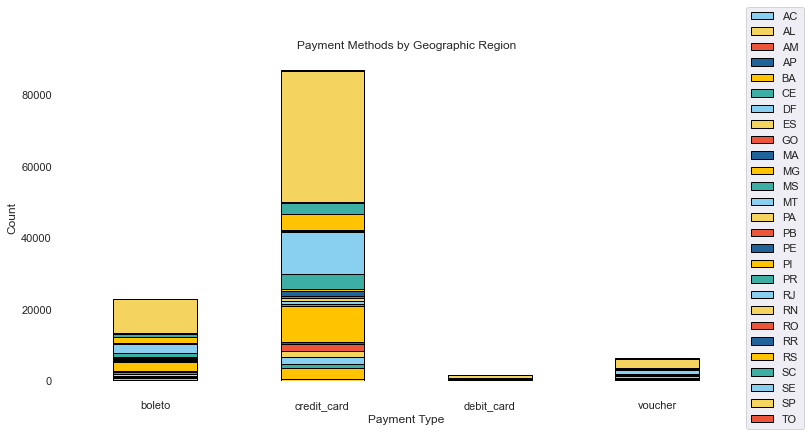

In [187]:
# create pivot table of payment types by state
payment_by_state = pd.pivot_table(ords, values='order_id', index='payment_type', columns='customer_state', aggfunc='count')

# plot pivot table as stacked bar chart
payment_by_state.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#89CFF0', '#F4D35E', '#ED553B', '#20639B', '#FFC300', '#3CAEA3'], edgecolor='black')

# add labels and title
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.title('Payment Methods by Geographic Region')

# move legend outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# add shadow and make the chart pop out
plt.box(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.gca().spines['left'].set_position(('outward', 10))
plt.gca().spines['bottom'].set_position(('outward', 10))
plt.gca().patch.set(hatch='/', edgecolor='black', linewidth=0.5, alpha=0.1)

# display plot
plt.show()


**Discussion:** Based on the data, it appears that `credit_card` is the most commonly used payment method by Olist customers, accounting for 73.7% of all payments. `boleto` is the second most popular method with 19.5%, followed by `voucher` at 5.4%, and `debit_card` with only 1.4%

### Question 10: How does Olist's marketing spend and channel mix impact sales and customer acquisition costs, and how can the company optimize its marketing strategy to increase ROI?


We can analyze the relationship between Olist's marketing spend and channel mix with sales and customer acquisition costs. This can be done by looking at the data on the amount spent on marketing across different channels such as social media, email, and search engine marketing, and then comparing it with the sales generated from each channel and the cost of acquiring new customers from each channel.

We can then use this data to identify which channels are the most effective in terms of generating sales and acquiring new customers, and allocate more resources towards these channels. This can be done through various tactics such as increasing spend on high-performing channels, optimizing ad targeting and messaging, and experimenting with new channels and campaigns.

To further increase ROI, Olist can also focus on improving customer retention and increasing customer lifetime value through tactics such as personalized marketing, loyalty programs, and upselling and cross-selling.

**Without the marketing data, we are unable to answer the question**

### Question 11: Which product categories have the highest profit margins on Olist, and how can the company increase profitability across different categories?

In [218]:
# calculate cost of goods sold for each order
ord_['cost_of_goods_sold'] = ord_['price'] + ord_['freight_value']

# group orders by product category and calculate total revenue and cost of goods sold
category_profit = ord_.groupby('product_eng')['payment_value', 'cost_of_goods_sold'].sum()

# calculate profit margin for each category
category_profit['profit_margin'] = (category_profit['payment_value'] - category_profit['cost_of_goods_sold']) 
category_profit['profit_margin_%']=((category_profit['profit_margin']/ category_profit['payment_value'])*100).round(1)
# sort categories based on profit margin and select top categories
top_categories = category_profit.sort_values('profit_margin_%', ascending=False).head(10)
top_categories
least_categories = category_profit.sort_values('profit_margin_%', ascending=False).tail(10)
top_categories

,payment_value,cost_of_goods_sold,profit_margin,profit_margin_%
product_eng,,,,
fixed_telephony,206296.60,65751.75,140544.85,68.1
drinks,71926.13,28846.34,43079.79,59.9
signaling_and_security,68488.05,28120.83,40367.22,58.9
diapers_and_hygiene,4070.26,1990.28,2079.98,51.1
office_furniture,650428.95,357584.07,292844.88,45.0
christmas_supplies,18994.77,12079.84,6914.93,36.4
furniture_decor,1432399.73,947259.75,485139.98,33.9
fashio_female_clothing,5150.44,3466.21,1684.23,32.7
furniture_living_room,136853.98,92597.42,44256.56,32.3


In [217]:
least_categories

,payment_value,cost_of_goods_sold,profit_margin,profit_margin_%
product_eng,,,,
fashion_underwear_beach,12714.54,12419.06,295.48,2.3
portable kitchen_and_food_preparators,4335.65,4278.29,57.36,1.3
musical_instruments,233201.70,230579.09,2622.61,1.1
dvds_blu_ray,7935.28,7889.99,45.29,0.6
security_and_services,324.51,324.51,0.00,0.0
music,6901.43,6973.59,-72.16,-1.0
small_appliances_home_oven_and_coffee,51229.32,51830.37,-601.05,-1.2
home_appliances,99300.25,101179.43,-1879.18,-1.9
home_appliances_2,125331.03,136410.15,-11079.12,-8.8


**Discussion:** Based on the analysis, it appears that `fixed_telephony` and `drinks` have the highest profit margins on Olist, with `fixed_telephony` having a margin of around 68% and `drinks` having a margin of 59.9%. On the other hand, the categories with the least profit margins are `home_appliances_2` with a margin of -8.8% and `furniture_mattress_and_upholstery` with a margin of -9.2%.

To increase profitability across different categories, Olist could consider the following strategies:

1. Adjust pricing: If some categories have lower profit margins, Olist could consider adjusting the pricing of these products to increase profitability.

2. Reduce costs: Olist could look for ways to reduce costs associated with certain categories, such as negotiating better deals with suppliers or optimizing shipping processes.

3. Promote high-margin products: By promoting products with high profit margins, Olist can increase their overall profitability. This could be done through targeted marketing campaigns or highlighting these products on the Olist platform.

4. Expand product offerings: Olist could consider expanding their product offerings in categories with high profit margins to further increase profitability.

5. Improve operational efficiency: By streamlining processes and improving operational efficiency, Olist can reduce costs and increase profitability across all categories. This could involve investing in technology or improving logistics and supply chain management.

### Question 12: Geolocation having high customer density. Calculate customer retention rate according to geolocations

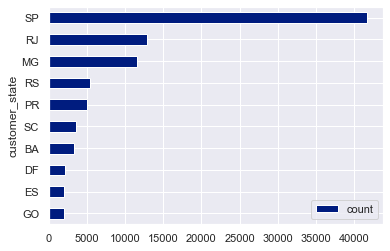

In [202]:
cust_dis = cust.groupby('customer_state').customer_state.count().to_frame()
cust_dis.rename(columns = {'customer_state':'count'}, inplace = True)
cust_dis10 = cust_dis.reset_index().sort_values(by = 'count', ascending = False).head(10)
cust_dis10.sort_values(by = 'count', ascending = True).plot(kind = 'barh', x = 'customer_state', y = 'count')
plt.show()

**Discussion:** From the above chart, it can be seen that the state SP has the highest customer density with over 40,000 of the company coming from that state. Followed by RJ and MG

